In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# dimensions
df.shape

(8523, 12)

In [5]:
# statisticalinfo
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
# datatype of the attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# check the unique values 
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [8]:
# NULL VALUES
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.mean()

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [10]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('missing')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','lf':'Low Fat','low fat':'Low Fat'})
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#  visualisation

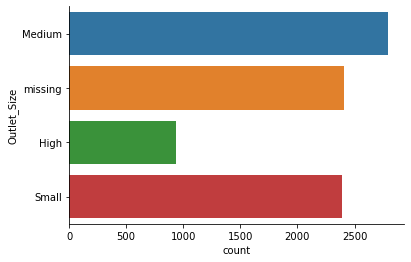

In [14]:
sns.countplot(y="Outlet_Size", data=df)
sns.despine()

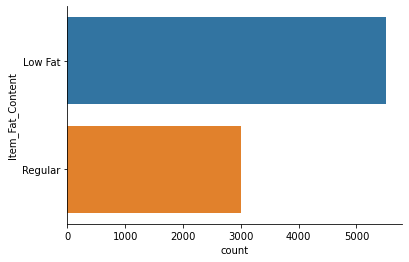

In [15]:
sns.countplot(y = 'Item_Fat_Content', data = df)
sns.despine()

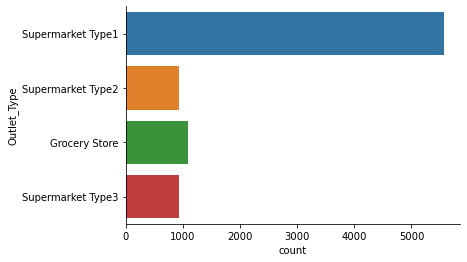

In [16]:
sns.countplot(y = 'Outlet_Type', data = df)
sns.despine()

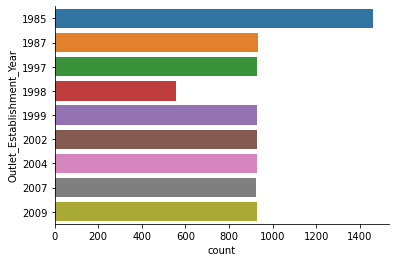

In [17]:
sns.countplot(y = 'Outlet_Establishment_Year', data = df)
sns.despine()

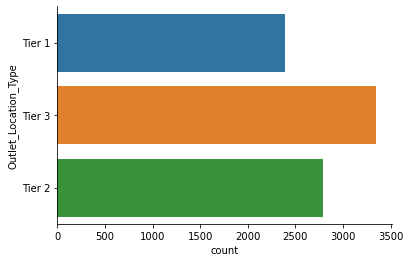

In [18]:
sns.countplot(y = 'Outlet_Location_Type', data = df)
sns.despine()

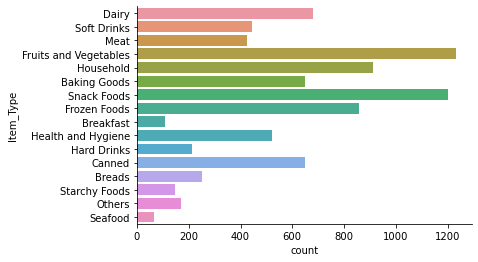

In [19]:
sns.countplot(y = 'Item_Type', data = df)
sns.despine()

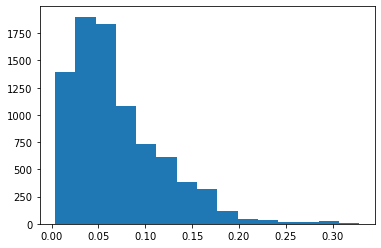

In [20]:
plt.hist(x = 'Item_Visibility',data = df,bins = 15)
plt.rc("axes.spines", top=False, right=False)

In [21]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


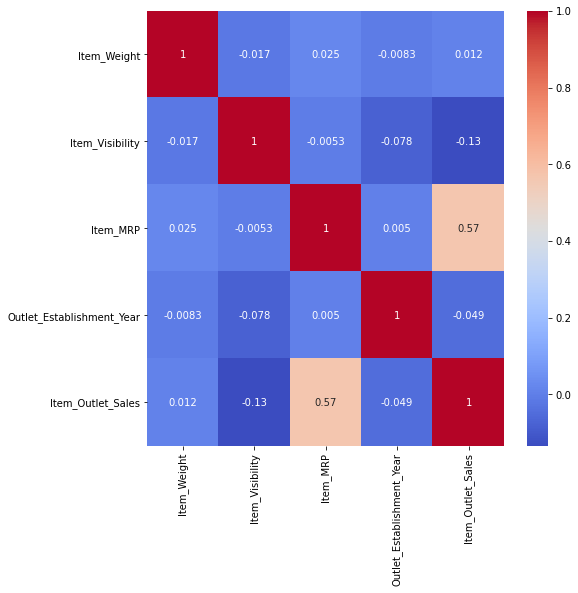

In [22]:
plt.figure(figsize =(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

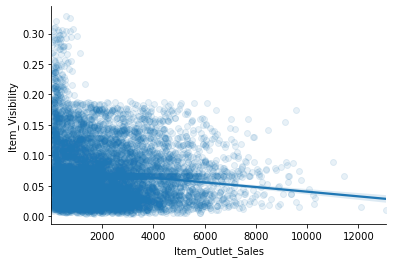

In [23]:
sns.regplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = df , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()

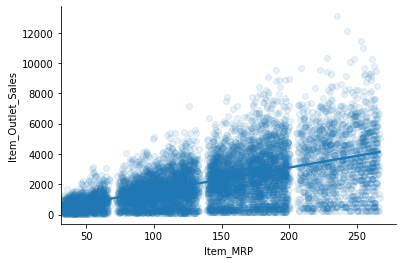

In [24]:
sns.regplot(x = 'Item_MRP',y ='Item_Outlet_Sales',data = df , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()

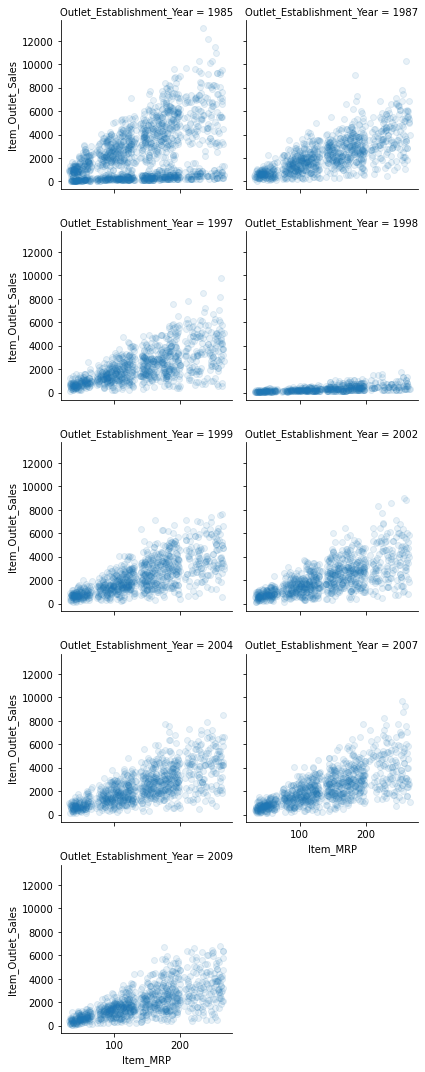

In [25]:
grid = sns.FacetGrid(df, col='Outlet_Establishment_Year',col_wrap = 2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.1)
sns.despine()

In [26]:
# Here we convert the string datatypes of certain columns to numeric ones.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

li = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Fat_Content','Outlet_Identifier']
for i in li:
    df[i] = le.fit_transform(df[i])
    
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.066132,Fruits and Vegetables,182.0950,0,1998,3,2,0,732.3800
4,NCD19,8.93,0,0.066132,Household,53.8614,1,1987,0,2,1,994.7052


In [27]:
dum = pd.get_dummies(df['Outlet_Identifier'])
df1 = pd.concat([df,dum],axis=1)

label = df1['Item_Outlet_Sales']

train = df1.drop(columns=['Item_Identifier','Item_Weight','Item_Outlet_Sales','Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.066132,Fruits and Vegetables,182.0950,0,1998,3,2,0,732.3800
4,NCD19,8.93,0,0.066132,Household,53.8614,1,1987,0,2,1,994.7052


# Splitting the data for training and testing

In [28]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train , label , test_size = 0.40,random_state = 101)

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [30]:
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
reg.score(x_test,y_test)

0.5680699358011243

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

grad = GradientBoostingRegressor(n_estimators = 100)

In [33]:
grad.fit(x_train,y_train)

grad.score(x_test, y_test)

0.6051355316096018

In [34]:
from sklearn.ensemble import RandomForestRegressor

ran = RandomForestRegressor(n_estimators = 50)

In [35]:
ran.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [36]:
ran.score(x_test, y_test)

0.5492614213354347